In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Sushanth V\OneDrive\Desktop\bhp.csv")

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [7]:
df=pd.read_csv(r"C:\Users\Sushanth V\OneDrive\Desktop\heights.csv")

In [11]:
import matplotlib.pyplot as plt

In [12]:
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


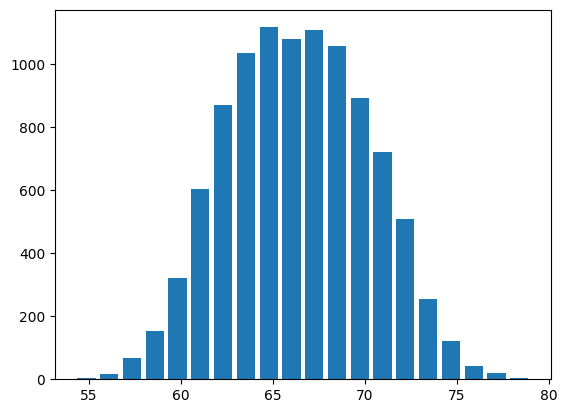

In [16]:
plt.hist(df.Height,rwidth=0.8,bins=20)
plt.show()

In [17]:
df.Height.min()

54.26313333

In [18]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

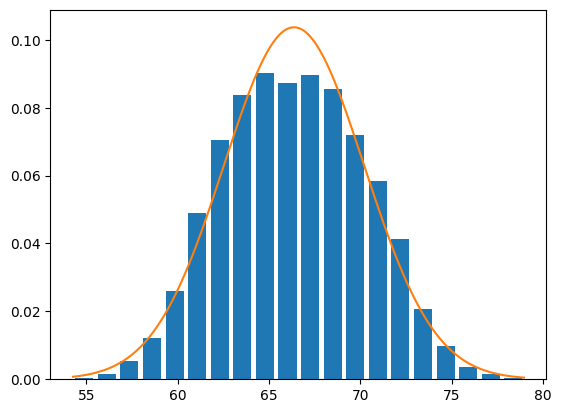

In [25]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height,bins=20,rwidth=0.8,density=True)
rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [26]:
df.Height.mean()

66.367559754866

In [27]:
df.Height.std()

3.847528120795573

In [28]:
upper_limit=df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411725271

In [29]:
lower_limit=df.Height.mean()-3*df.Height.std()
lower_limit

54.824975392479274

In [30]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [34]:
df1=df[(df.Height<upper_limit)&(df.Height>lower_limit)]
df1.shape

(9993, 2)

In [36]:
df['zscore']=(df.Height-df.Height.mean())/df.Height.std()

In [39]:
df.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [40]:
df[df['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [42]:
df[df['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [43]:
df=pd.read_csv(r"C:\Users\Sushanth V\OneDrive\Desktop\bhp.csv")

In [52]:
df.shape

(13200, 7)

In [45]:
df['price_per_sqft']

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

In [46]:
min_threshold,max_threshold=df['price_per_sqft'].quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [49]:
outliers=df[(df['price_per_sqft']<min_threshold)|(df['price_per_sqft']>max_threshold)]

In [50]:
outliers.shape[0]

28

In [51]:
df1=df[(df['price_per_sqft']>min_threshold)&(df['price_per_sqft']<max_threshold)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [53]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [55]:
df1.shape

(13172, 7)

In [56]:
df1['price_per_sqft'].mean()

6663.6537351958705

In [57]:
df1['price_per_sqft'].std()

4141.020700174613

In [60]:
upper_limit=df1['price_per_sqft'].mean()+4*df1['price_per_sqft'].std()
lower_limit=df1['price_per_sqft'].mean()-4*df1['price_per_sqft'].std()

In [61]:
upper_limit,lower_limit

(23227.73653589432, -9900.429065502582)

In [63]:
df2=df[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]
df2.shape

(139, 7)

In [65]:
df2=df[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
df2.shape

(13061, 7)

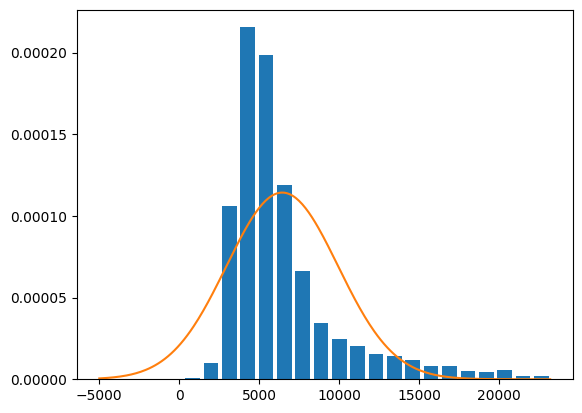

In [76]:
plt.hist(df2['price_per_sqft'],rwidth=0.8,bins=20,density=True)
from scipy.stats import norm
rng=np.arange(-5000,df2['price_per_sqft'].max(),100)
plt.plot(rng,norm.pdf(rng,df2['price_per_sqft'].mean(),df2['price_per_sqft'].std()))

In [71]:
df2['price_per_sqft'].max()

23214

In [80]:
df2['zscore']=(df2['price_per_sqft']-df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()
df2.sample(10)

C:\Temp\ipykernel_10780\1366334091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2['price_per_sqft']-df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8514,Kanakpura Road,3 BHK,1592.0,3.0,125.00,3,7851,0.403273
12524,Horamavu Agara,3 BHK,1300.0,2.0,52.00,3,4000,-0.699957
4123,Doddathoguru,2 BHK,915.0,2.0,32.00,2,3497,-0.844056
685,other,2 BHK,1240.0,2.0,60.00,2,4838,-0.459888
4464,Munnekollal,10 Bedroom,1200.0,7.0,240.00,10,20000,3.883706
7501,other,6 Bedroom,1050.0,4.0,155.00,6,14761,2.382843
7301,Old Madras Road,4 BHK,3630.0,6.0,196.00,4,5399,-0.299173
2261,Bannerghatta Road,2 BHK,1255.0,2.0,65.26,2,5200,-0.356182
6849,Kogilu,2 BHK,1200.0,2.0,53.33,2,4444,-0.572761
7613,Doddathoguru,2 BHK,925.0,2.0,30.00,2,3243,-0.916822


In [91]:
outliers=df2[(df2['zscore']>4)|(df2['zscore']<-4)]
outliers.shape

(86, 8)